# Trees

## loading data

In [1]:
from data import Data
import tomllib

with open("config.toml", "rb") as file:
    config = tomllib.load(file)
    
data = Data(config)

Reading data...


## Setup for TreeBuilder

Note: `arg_combos` is only used in the multiprocessing cell.

In [2]:
from ml.tree import TreeBuilder
from rpy2 import robjects
import itertools

treebuilder = TreeBuilder(data)

# define parameters to be passed to ctree
teststats: list[str] = ["quad", "max"]
testtypes: list[str | list] = [
    "Teststatistic",
    "Univariate",
    "Bonferroni",
    "MonteCarlo",
    robjects.r.c("MonteCarlo", "Bonferroni"),
]
splitstats: list[str] = ["quad", "max"]
# splittests: list[bool] = [True, False]
alphas: list[float] = [0.1, 0.05, 0.01]
predictors: list[list[str]] = [
    ["consensus independent component 1"],
    ["consensus independent component 2"],
    ["consensus independent component 3"],
]

# make all possible combinations of parameters above
arg_combos = itertools.product(
    teststats, testtypes, splitstats, alphas, predictors
)

making R dataframe...


## ctree: multiprocessed

Build trees of all possible argument combinations of the cell above.

Note: this might take a while depending on the number of arguments and the size of the dataset.

All plots are saved in `ml/[predictor]/`, or, e.g., `ml/[predictor1]_[predictor3]/` when multiple predictors are defined.

In [ ]:
import multiprocessing as mp
from datetime import datetime

t0 = datetime.now()
print(f"starting time: {t0.time()}")

with mp.Pool(config["execution"]["cores"]) as p:
    p.starmap(treebuilder.build_ctree, arg_combos)
    
print("Time taken:", datetime.now() - t0)

## ctree: single tree

All plots are saved in `ml/[predictor]/`, or, e.g., `ml/[predictor1]_[predictor3]/` when multiple predictors are defined.

building tree...
ctree_ts=quad_tt=['MonteCarlo' 'Bonferroni']_ss=quad_st=False_a=0.05.png


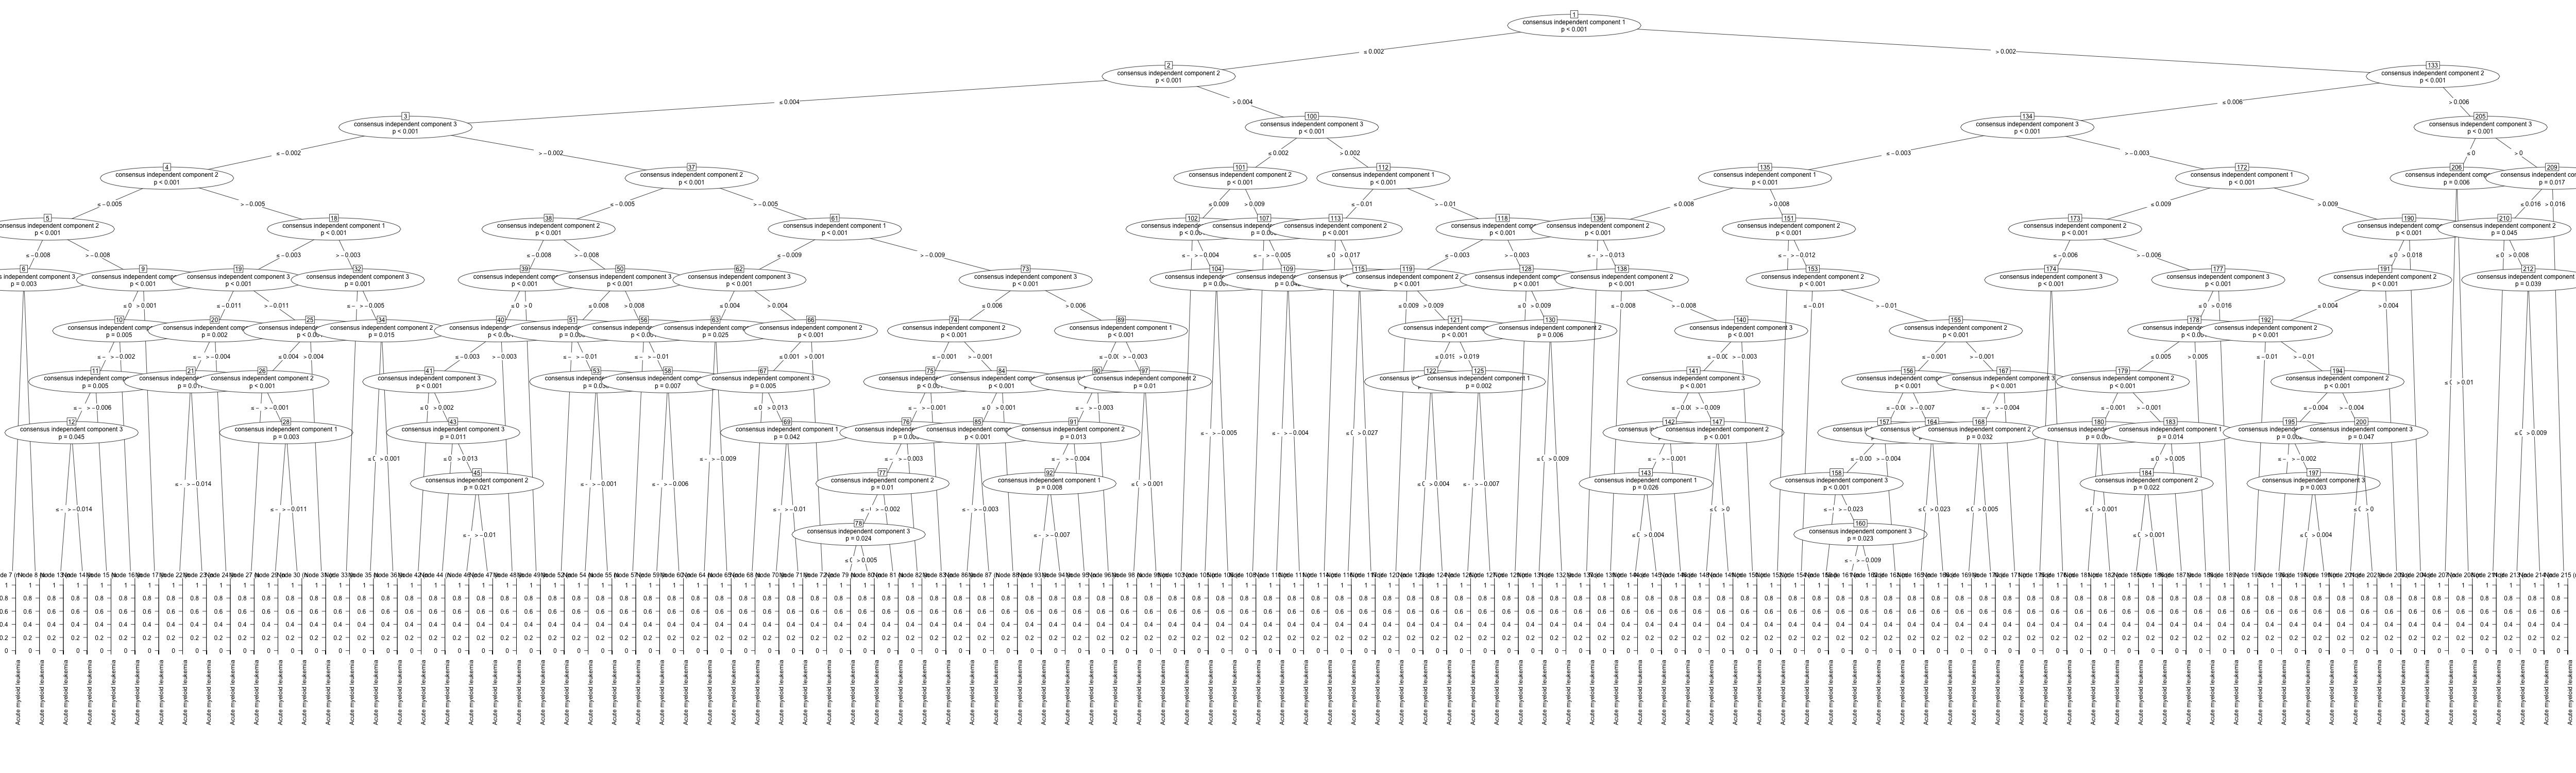

In [7]:
%matplotlib inline
from IPython.display import Image

image_path = treebuilder.build_ctree(
    testtype=robjects.r.c("MonteCarlo", "Bonferroni"),
    teststat="quad",
    splittest=False,
    predictors=[
        "consensus independent component 1",
        "consensus independent component 2",
        "consensus independent component 3",
    ]
)

Image(image_path)